In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [ ]:
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 85)

In [3]:
data = pd.read_csv('complaints_cleaned.csv')

/Users/hyejinkim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
'''
Initial Data set is a filtered download from NYC 311 complaints, targeted with the follow Complaint Types:

Blocked Driveway
Illegal Parking
Dirty Condition
Dirty Conditions
Food Establishment
Noise - Commercial
Noise - Street/Sidewalk
Open Dining

'''


In [ ]:
# dropped additional columns

#data.drop(['Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2'], axis = 1, inplace=True)

In [6]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'BBL', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Vehicle Type', 'Latitude', 'Longitude', 'Location', 'year', 'month'],
      dtype='object')

In [5]:
data = data.drop('Unnamed: 0', axis = 1)

In [86]:
#create a year column from the Created Date
data['year'] = pd.DatetimeIndex(data['Created Date']).year

In [88]:
#create a year column from the Created Date
data['month'] = pd.DatetimeIndex(data['Created Date']).month

In [60]:
data.rename(columns={'year': 'Year', 'month': 'Month'}, inplace=True)

In [62]:
data['Year_Month'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

In [8]:
#consolidate Dirty Condition/s category into 1
data.loc[data['Complaint Type'] == 'Dirty Condition', 'Complaint Type'] = 'Dirty Conditions'

In [53]:
#find the unique description types, remove rows that do not seem relevant from 82 description types

len(set(data['Descriptor']))

82

In [20]:
data.groupby(['Complaint Type', 'Descriptor'])['Descriptor'].agg('count').sum()

#total of complaint rows 762,241

762241

In [9]:
data.groupby(['Complaint Type','Descriptor'])[['Unique Key']].count()

Unique Key
Complaint Type          Descriptor                                  
Blocked Driveway        No Access                              23794
                        Partial Access                          6679
Dirty Conditions        Broken Glass                              27
                        Debris from Car Accident                   3
                        Dirt or Gravel                             9
                        Dog Waste                                 61
                        E1 Improper Disposal                    5495
                        E11 Litter Surveillance                 1308
                        E12 Illegal Dumping Surveillance        2346
                        E13 Throw-Out                            292
                        E15 Illegal Postering                   8866
                        E1A Litter Basket / Improper Use         845
                        E2 Receptacle Violation                 2682
                        E3 Dirty Sidewalk                      20461
                        E3A Dirty Area/Alleyway                 3134
                        E3B Sidewalk Obstruction                  83
                        E4 18" Law                              1070
                        E5 Loose Rubbish                        2357
                        E7 Private Carter Spillage                79
                        E8 Canine Violation                     3149
                        Poster or Sign                             3
                        Syringes                                  47
                        Trash                                   1276
Food Establishment      Allergy Information                       89
                        Bare Hands in Contact w/ Food           2080
                        Dishwashing/Utensils                     460
                        Facility Construction                    346
                        Food Contains Foreign Object            2000
                        Food Contaminated                       2246
                        Food Preparation Location                510
                        Food Protection                          705
                        Food Spoiled                            2307
                        Food Temperature                         943
                        Food Worker Activity                     299
                        Food Worker Hygiene                     1185
                        Food Worker Illness                      166
                        Handwashing                              479
                        Kitchen/Food Prep Area                  1571
                        Letter Grading                          2965
                        Lighting                                  21
                        Milk Expired                               9
                        Milk Not Pasteurized                      14
                        No Permit or License                     729
                        Odor                                     686
                        Permit/License/Certificate               459
                        Pesticide                                119
                        Pet/Animal                              1855
                        Plumbing                                 127
                        Rodents/Insects/Garbage                10160
                        Sewage                                   215
                        Sign                                      63
                        Sodium Warning                             6
                        Toilet Facility                          963
                        Toxic Chemical/Material                  105
                        Ventilation                              254
                        Water                                    133
Illegal Parking         Blocked Bike Lane               

In [10]:

'''
Additional Description rows to filter out and remove:

Blocked Driveway: Keep All

Dirty Conditions: Broken Glass, Debris from Car Accident, Dirt or Gravel, Dog Waste, E15 Illegal Postering,
E4 18" Law, E8 Canine Violation, Poster or Sign, Syringes

Food Establishment: No Permit or License, Permit/License/Certificate, Rodents/Insects/Garbage

Illegal parking: *Remove* Overnight Commercial Storage, Detached Trailer, Unauthorized Bus Layover

Noise - Commercial: Keep All

Noise - Street/Sidewalk: Keep All

'''

'\nAdditional Description rows to filter out and remove:\n\nBlocked Driveway: Keep All\n\nDirty Conditions: Broken Glass, Debris from Car Accident, Dirt or Gravel, Dog Waste, E15 Illegal Postering,\nE4 18" Law, E8 Canine Violation, Poster or Sign, Syringes\n\nFood Establishment: No Permit or License, Permit/License/Certificate, Rodents/Insects/Garbage\n\nIllegal parking: *Remove* Overnight Commercial Storage, Detached Trailer, Unauthorized Bus Layover\n\nNoise - Commercial: Keep All\n\nNoise - Street/Sidewalk: Keep All\n\n'

In [17]:
# Descriptors to drop within dirty conditions category

dirty_conditions_drop = ['Broken Glass', 'Debris from Car Accident', 'Dirt or Gravel', 'Dog Waste', 
                         'E15 Illegal Postering', 'E4 18" Law', 'E8 Canine Violation', 'Poster or Sign', 'Syringes']

In [21]:
# Dropped the above
data = data.drop(data[data.Descriptor.isin(dirty_conditions_drop)].index)

#749006 rows left

In [24]:
food_establishment_keep = ['No Permit or License', 'Permit/License/Certificate', 'Rodents/Insects/Garbage']

In [39]:
data_food = data[data['Descriptor'].isin(food_establishment_keep)]

In [43]:
#remove all Food Establishment

data = data[data['Complaint Type'] != 'Food Establishment'] 

In [ ]:
#add back filtered food establishment rows

In [47]:
data = pd.concat([data, data_food], axis=0)

#726085 rows left

In [49]:
#remove the following illegal parking types
illegal_parking_drop = ['Overnight Commercial Storage', 'Detached Trailer', 'Unauthorized Bus Layover']

In [53]:
# Dropped the above
data = data.drop(data[data.Descriptor.isin(illegal_parking_drop)].index)

#719674 rows left

In [57]:
data.groupby(['Complaint Type','Descriptor'])[['Unique Key']].count()

Unique Key
Complaint Type          Descriptor                                  
Blocked Driveway        No Access                              23794
                        Partial Access                          6679
Dirty Conditions        E1 Improper Disposal                    5495
                        E11 Litter Surveillance                 1308
                        E12 Illegal Dumping Surveillance        2346
                        E13 Throw-Out                            292
                        E1A Litter Basket / Improper Use         845
                        E2 Receptacle Violation                 2682
                        E3 Dirty Sidewalk                      20461
                        E3A Dirty Area/Alleyway                 3134
                        E3B Sidewalk Obstruction                  83
                        E5 Loose Rubbish                        2357
                        E7 Private Carter Spillage                79
                        Trash                                   1276
Food Establishment      No Permit or License                     729
                        Permit/License/Certificate               459
                        Rodents/Insects/Garbage                10160
Illegal Parking         Blocked Bike Lane                      20405
                        Blocked Crosswalk                        372
                        Blocked Hydrant                        27994
                        Blocked Sidewalk                       21217
                        Commercial Overnight Parking            5318
                        Double Parked Blocking Traffic         21029
                        Double Parked Blocking Vehicle         15735
                        Parking Permit Improper Use             4142
                        Posted Parking Sign Violation          67386
Noise - Commercial      Banging/Pounding                       17135
                        Car/Truck Horn                          2916
                        Car/Truck Music                         3352
                        Loud Music/Party                      123411
                        Loud Talking                           13980
                        Loud Television                          288
Noise - Street/Sidewalk Loud Music/Party                      214555
                        Loud Talking                           75247

In [56]:
#remove all outdoor dining (this is going to be parsed out)

data = data[data['Complaint Type'] != 'Outdoor Dining'] 

In [58]:
# saved filtered columns to saved csv
data.to_csv('complaints_cleaned_4_22.csv')

In [ ]:
###### line graphs for each main category of complains #######

In [64]:
data.shape

(716661, 25)

In [9]:
data_zip_filter = data[data['Incident Zip'].isin(
[10003,
 10012,
 10014,
 10013,
 10019,
 10002,
 10011,
 10036,
 10009,
 10016,
 10001,
 10022,
 10010,
 10024,
 10025])]

<AxesSubplot:xlabel='Complaint Type'>

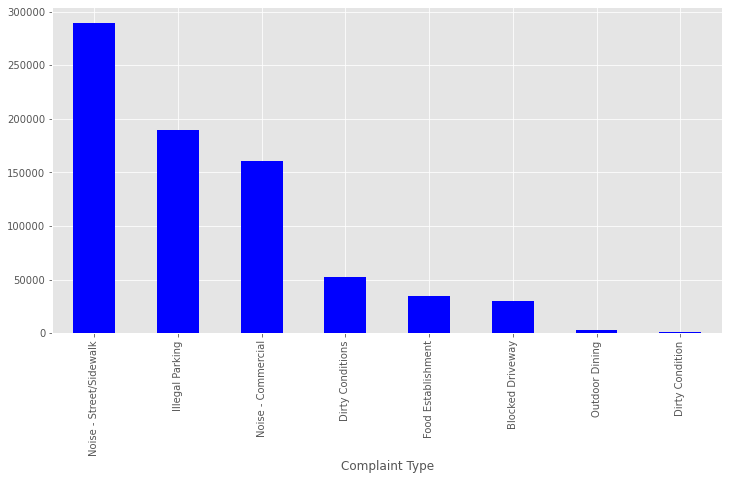

In [10]:
plt.figure(figsize = (12,6))
data.groupby('Complaint Type')['Unique Key'].count().sort_values(ascending=False).plot.bar(color = 'b')

In [11]:
data.groupby(['year','Incident Zip'])[['Unique Key']].count().sort_values('Unique Key', ascending=False)

Unique Key
year Incident Zip            
2020 10032.0            10037
     10034.0             9734
     10031.0             8152
     10040.0             7730
2018 10040.0             5430
...                       ...
2017 10115.0                1
     10048.0                1
     10045.0                1
2016 83                     1
2022 10463                  1

[1742 rows x 1 columns]

In [16]:
data_opendining = data[data['Complaint Type'] == 'Outdoor Dining']

In [22]:
data_opendining.groupby('Descriptor')[['Unique Key']].count().sort_values('Unique Key', ascending=False)

,Unique Key
Descriptor,
Sidewalk Zone Blocked,1211
Site Setup Condition,973
Street Zone Blocked,355
Barrier Condition,299
Table Not in Compliance,86
Unauthorized Restaurant,83
ADA Ramp Missing,5
Utility Cover Blocked,1
